<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Stock_Prices_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, you will be able to :

* apply PCA based analysis on various stocks data
* analyze and create time series data
* implement LSTM auto-encoders
* detect the anomalies based on the loss


## Information

Autoencoder Neural Networks try to learn data representation of its input. Usually, we want to learn an efficient encoding that uses fewer parameters/memory. The encoding should allow for output similar to the original input. In a sense, we’re forcing the model to learn the most important features of the data using as few parameters as possible.

LSTM autoencoder is an encoder that makes use of LSTM encoder-decoder architecture to compress data using an encoder and decode it to retain original structure using a decoder.

**Anomaly Detection**

Anomaly detection refers to the task of finding/identifying rare events/data points. Some applications include - bank fraud detection, tumor detection in medical imaging, and errors in written text.

A lot of supervised and unsupervised approaches for anomaly detection have been proposed. Some of the approaches include - One-class SVMs, Bayesian Networks, Cluster analysis, and Neural Networks.

We will use an LSTM Autoencoder Neural Network to detect/predict anomalies (sudden price changes) in the S&P 500 index.

## Dataset



This mini-project consists of two parts and two different stock price datasets:

### PART A

Using the **S&P 500 stock prices data of different companies**, we will perform a PCA based analysis.

### PART B

Using the **S&P 500 stock price index time series data**, we will perform anomaly detection in the stock prices across the years. The dataset chosen is is S&P500 Daily Index a .csv format with one column with a daily timestamp and the second column with the raw, un-adjusted closing prices for each day. This long term, granular time series dataset allows researchers to have a good sized publicly available financial dataset to explore time series trends or use as part of a quantitative finance project.

## Problem Statement

Detect the stock price anomalies by implementing an LSTM autoencoder

In [ ]:
#@title Download dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/SPY.csv
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/prices.csv

### Import required packages

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import LSTM, RepeatVector, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

## PCA Analysis (PART-A)

Principal Component Analysis (PCA) decomposes the data into many vectors called principal components. These summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

Perform PCA based analytics on the stock prices data from different companies.

Hint: Refer to the article [here](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).


### Load and pre-process the prices data

In [ ]:
prices_path = "prices.csv"
# YOUR CODE HERE
prices_df = pd.read_csv(prices_path, skip_blank_lines=True).dropna()
prices_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
345,130.977844,22.400000,201.780090,127.449997,115.146317,116.519997,268.559998,117.861290,287.388763,486.559998,148.980087,67.289894,193.726654,277.630005,83.165512,86.760002,25.370001,56.129765,51.580738,160.570282,146.817886,113.160004,163.443619,569.039978,69.839996,138.443436,139.884949,124.612114,12.247750,74.589996,134.142944,251.380005,258.339996,245.584198,3222.899902,326.380005,326.470001,392.794159,254.240005,71.769997,...,226.940002,84.915169,38.689495,81.209999,190.795410,45.349998,174.705292,220.919998,217.089996,54.215118,15.887107,58.038521,80.529999,312.239990,54.242851,71.870003,96.199997,73.220001,46.959999,245.274368,264.126923,141.361664,25.502794,139.520004,79.801300,60.334812,332.917389,24.623957,38.137524,126.669998,71.247643,118.000000,60.770000,67.713547,118.116089,118.775055,167.025803,486.730011,60.200001,172.072266
346,129.939209,23.350000,203.541107,126.269997,115.601242,118.110001,267.950012,116.297241,286.192139,482.739990,147.476440,67.269997,193.656982,274.779999,82.867439,85.449997,25.170000,56.089996,51.252766,160.998535,146.020493,113.489998,157.437073,559.520020,71.669998,138.204849,138.568375,123.354317,12.168541,74.650002,133.743530,252.380005,257.149994,244.718353,3270.389893,325.790009,321.230011,392.524933,255.199997,70.870003,...,226.440002,86.117737,38.192329,81.620003,192.721527,46.119999,172.648758,219.660004,216.350006,53.847996,16.036049,57.296848,80.400002,308.940002,54.827816,76.419998,95.760002,73.120003,47.900002,244.081390,265.273773,140.933395,26.143322,138.889999,78.730545,61.570000,326.550293,24.653669,37.898605,124.730003,70.333702,118.139999,62.189999,68.831619,117.258156,118.157639,165.567917,482.010010,60.270000,170.054825
347,128.580994,23.559999,199.024155,124.849998,115.917717,116.949997,272.970001,116.536339,282.213379,480.619995,145.275742,67.029999,191.636505,272.750000,83.394051,85.750000,24.889999,55.910000,50.795597,158.080521,146.578659,112.739998,158.993607,569.500000,70.290001,136.325928,136.832916,121.597382,12.069529,74.440002,131.886261,250.860001,252.779999,245.176163,3232.280029,325.679993,321.179993,392.305573,254.210007,68.870003,...,225.570007,85.968658,39.932411,79.580002,189.677658,46.459999,171.770233,217.919998,214.649994,53.599941,15.936753,56.545284,79.110001,305.070007,54.788155,73.209999,95.400002,73.129997,46.860001,239.100739,262.950165,139.897644,25.946236,141.910004,77.977051,59.720001,326.720215,24.623957,37.151981,126.139999,70.343636,117.809998,60.430000,67.304245,114.863907,118.794975,166.296860,477.549988,58.250000,169.895020
348,130.039078,22.969999,193.591888,124.690002,114.572708,118.739998,273.980011,115.938606,280.179108,480.470001,152.475296,66.430000,189.944473,273.970001,83.672264,85.919998,24.940001,55.759998,50.358303,156.437271,144.914124,112.940002,156.628891,571.489990,69.330002,134.894363,137.301697,124.582169,11.891309,76.230003,131.337067,248.630005,252.259995,244.867630,3231.800049,323.570007,326.489990,392.295593,252.229996,68.620003,...,224.589996,84.179710,39.465073,77.279999,184.577942,45.020000,172.778549,218.020004,214.050003,53.709084,15.390635,56.288170,77.989998,306.450012,54.341999,71.260002,94.870003,72.820000,46.169998,237.529999,261.145081,138.583023,25.650608,141.919998,78.086105,58.450001,325.720673,24.554621,37.112160,126.300003,70.105217,120.760002,58.980000,67.513885,112.908607,118.217384,165.517990,484.720001,57.419998,171.063553
349,131.976517,22.600000,195.949844,127.309998,115.818817,120.040001,276.390015,117.353233,283.150726,491.670013,158.798569,66.139999,193.229004,281.160004,83.960411,86.260002,25.350000,55.650002,50.219162,156.307800,146.160034,113.

In [ ]:
prices_df1 = pd.read_csv(prices_path, skiprows=1)
prices_df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 463,Unnamed: 464,Unnamed: 465,Unnamed: 466,Unnamed: 467,Unnamed: 468,Unnamed: 469,Unnamed: 470,Unnamed: 471,Unnamed: 472,Unnamed: 473,Unnamed: 474,Unnamed: 475,Unnamed: 476,Unnamed: 477,Unnamed: 478,Unnamed: 479,Unnamed: 480,Unnamed: 481,Unnamed: 482,Unnamed: 483,Unnamed: 484,Unnamed: 485,Unnamed: 486,Unnamed: 487,Unnamed: 488,Unnamed: 489,Unnamed: 490,Unnamed: 491,Unnamed: 492,Unnamed: 493,Unnamed: 494,Unnamed: 495,Unnamed: 496,Unnamed: 497,Unnamed: 498,Unnamed: 499,Unnamed: 500,Unnamed: 501,Unnamed: 502
0,85.017082,28.982893,157.171890,74.207466,81.950539,82.938141,168.809998,84.622925,204.910950,334.429993,116.998917,44.048424,164.650070,187.830002,73.122215,88.918884,19.133558,51.241142,49.003220,128.423721,93.231590,87.639999,71.061058,283.679993,67.785583,108.968430,123.176743,61.148903,9.971735,49.099998,99.718460,230.298279,163.271606,222.032486,1898.010010,204.720001,259.589996,295.028076,205.982056,46.387165,...,189.381256,96.426582,40.090492,86.901367,140.557083,60.242638,149.663574,196.729996,219.449997,52.252220,20.504297,56.621544,80.132065,235.059998,55.568127,64.771545,86.955795,75.164200,51.397491,141.787598,200.223602,111.092049,20.954809,116.044952,67.740730,41.771225,151.029617,24.689568,28.591002,142.405029,59.934875,100.115349,63.633118,56.203197,78.396255,99.349007,147.579269,259.140015,49.903751,132.803421
1,83.652077,27.548195,157.181747,73.486023,81.172668,81.895088,166.820007,83.591301,204.569687,331.809998,114.939316,43.962448,164.302048,184.949997,73.151054,88.823746,18.913849,50.885765,48.624527,129.034988,93.036346,87.239998,70.043243,280.440002,66.542633,108.978081,121.654099,60.175625,9.840403,48.599998,99.856964,228.734818,161.235901,222.139359,1874.969971,200.850006,256.970001,291.115570,205.173096,45.979324,...,187.875092,95.820480,39.480896,83.603630,139.946487,60.711697,151.119431,200.880005,217.979996,52.882324,20.057474,56.018700,79.518326,231.009995,55.568127,63.774597,87.502457,76.486641,51.081936,139.371140,200.272614,112.171654,21.044018,115.020508,67.829132,41.030972,151.427734,24.604725,28.639641,140.292755,60.223114,97.810677,63.121540,55.581242,78.857689,99.037834,147.193512,256.049988,49.199547,132.823227
2,83.899353,27.219410,154.598541,74.071579,81.813271,83.094116,179.039993,84.029251,203.233841,333.709991,113.588921,43.618546,164.524399,187.119995,73.218369,89.118690,19.133558,50.741692,48.662395,129.151443,93.465851,87.550003,69.964951,285.880005,66.224434,109.296829,121.428162,58.877934,9.774739,48.389999,99.965782,230.490112,161.766525,222.081070,1902.880005,202.860001,254.589996,294.616272,205.765030,46.270645,...,187.468826,95.445290,40.061920,83.612755,139.700287,61.502666,151.466049,202.740005,224.029999,53.429035,20.722746,55.898129,79.191666,228.880005,56.047810,62.550629,87.569580,77.649673,50.775940,140.679672,200.517624,112.755219,21.320560,114.786362,67.730896,40.406082,151.507355,24.369047,28.581272,140.015091,60.136642,95.771927,63.606186,55.887280,78.347168,98.979500,146.342834,258.010010,48.600010,131.803482
3,84.156532,27.119778,152.764648,73.723213,81.346550,82.499466,180.350006,83.562103,198.846008,333.390015,116.173134,43.093136,162.532974,187.500000,73.487579,89.137718,19.200424,50.261456,48.387844,128.278198,92.460426,90.199997,70.884911,283.059998,65.806808,108.359932,119.974274,60.578697,9.690312,48.250000,100.539551,228.322357,159.817673,217.348892,1906.859985,204.850006,256.670013,293.723907,204.018814,45.959904,...,186.973373,94.973892,40.128597,84.708961,138.124527,60.757

### Apply PCA (3 points)

* plot the explained variance ratio. Hint: `pca.explained_variance_ratio_`
* Represent the components which preserve maximum information and plot to visualize
* Compute the daily returns of the 500 company stocks. Hint: See the following [reference](https://towardsdatascience.com/stock-market-analytics-with-pca-d1c2318e3f0e).
* Plot the stocks with most negative and least negative PCA weights in the pandemic period (Year 2020). Use reference as above. Discuss the least and most impacted industrial sectors in terms of stocks.

[0.51515131 0.14383501 0.1094258  0.07156812 0.03313846 0.0213128
 0.01982059 0.01457376 0.00914795 0.00804534]


Text(0, 0.5, 'Cumulative Explained Variance for Price')

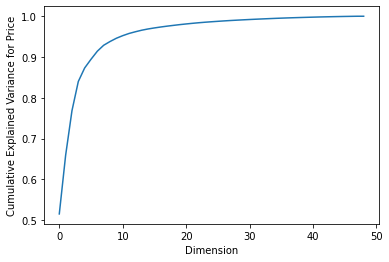

In [ ]:
# YOUR CODE HERE
price = prices_df.values
price_standard_scaler = StandardScaler().fit_transform(price)
pca = PCA()
price_pca = pca.fit_transform(price_standard_scaler)
print(pca.explained_variance_ratio_[:10])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimension")
plt.ylabel("Cumulative Explained Variance for Price")

            A       AAL       AAP  ...      ZBRA      ZION       ZTS
345       NaN       NaN       NaN  ...       NaN       NaN       NaN
346 -0.007961  0.041536  0.008690  ... -0.009745  0.001162 -0.011794
347 -0.010508  0.008953 -0.022442  ... -0.009296 -0.034090 -0.000940
348  0.011276 -0.025361 -0.027674  ...  0.014903 -0.014351  0.006854
349  0.014789 -0.016239  0.012106  ...  0.018721 -0.006640  0.026047

[5 rows x 503 columns]


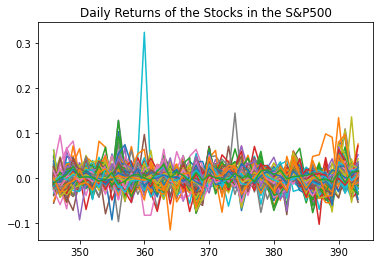

In [ ]:
rs = prices_df.apply(np.log).diff(1)
rs.plot(title='Daily Returns of the Stocks in the S&P500', legend=False)
print(rs.head())

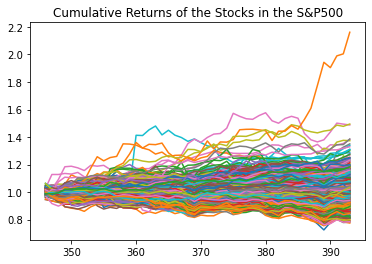

In [ ]:
crs = rs.cumsum().apply(np.exp)
crs.plot(title='Cumulative Returns of the Stocks in the S&P500', legend=False)

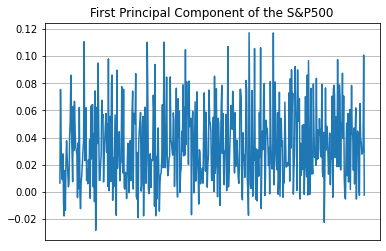

In [ ]:
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the S&P500')
plt.grid(axis='y')

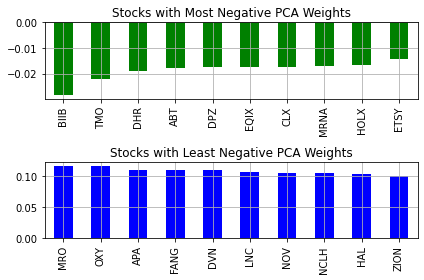

In [ ]:
fig, ax = plt.subplots(2,1)
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')
plt.tight_layout()

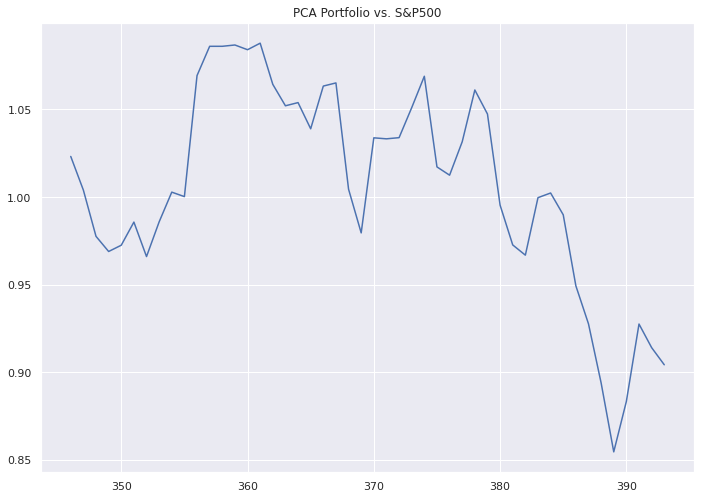

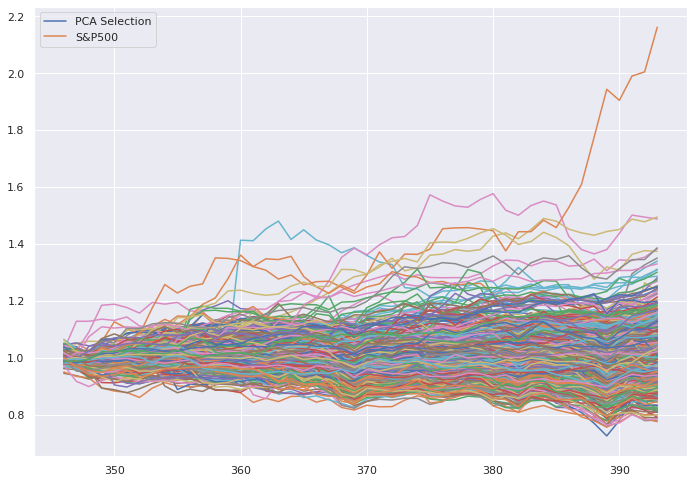

In [ ]:
myrs = rs[pc1.nlargest(10).index].mean(1)
mycrs = myrs.cumsum().apply(np.exp)
market_crs = rs.cumsum().apply(np.exp)
mycrs.plot(title='PCA Portfolio vs. S&P500')
market_crs.plot()
plt.legend(['PCA Selection', 'S&P500'])

#### Apply T-SNE and visualize with a graph

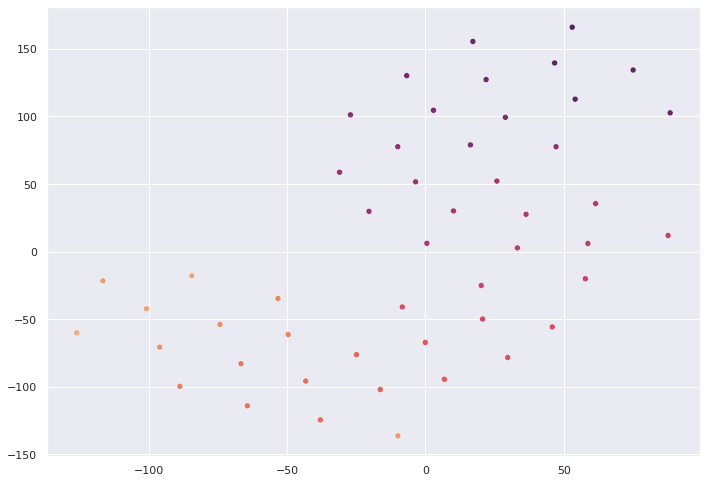

In [ ]:
# YOUR CODE HERE
tsne = TSNE()
X_embedded = tsne.fit_transform(price_standard_scaler)
y = list(range(49))
sns.set(rc={'figure.figsize': (11.7, 8.27)})
pallette = sns.color_palette('flare', 49)
sns.scatterplot(data=X_embedded, x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, palette=pallette, legend=None)

## Anomaly Detection (PART-B)

### Load and Preprocess the data

* Inspect the S&P 500 Index Data

In [ ]:
path = 'SPY.csv'

In [ ]:
# YOUR CODE HERE
spy_df = pd.read_csv(path)
print(spy_df.head())
print(" ")
print(spy_df.info())

         Date      Open      High       Low     Close  Adj Close  Volume
0  1993-02-01  43.96875  44.25000  43.96875  44.25000  25.983273  480500
1  1993-02-02  44.21875  44.37500  44.12500  44.34375  26.038315  201300
2  1993-02-03  44.40625  44.84375  44.37500  44.81250  26.313566  529400
3  1993-02-04  44.96875  45.09375  44.46875  45.00000  26.423655  531500
4  1993-02-05  44.96875  45.06250  44.71875  44.96875  26.405315  492100
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7134 non-null   object 
 1   Open       7134 non-null   float64
 2   High       7134 non-null   float64
 3   Low        7134 non-null   float64
 4   Close      7134 non-null   float64
 5   Adj Close  7134 non-null   float64
 6   Volume     7134 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 390.3+ KB
None


#### Data Preprocessing

In [ ]:
# YOUR CODE HERE


print('Historical Spot price visualization:')
plt.figure(figsize = (15,5))
plt.plot(spot_price)
plt.title('Henry Hub Spot Price (Daily frequency)')
plt.xlabel ('Date_time')
plt.ylabel ('Price ($/Mbtu)')
plt.show()

In [ ]:
spy_df.shape[0]

7134

### Create time series data ( 1 point)

Select the variable (column) from the data and create the series of data with a window size.

Refer [LSTM Autoencoder](https://medium.com/swlh/time-series-anomaly-detection-with-lstm-autoencoders-7bac1305e713)

In [ ]:
# YOUR CODE HERE
train_size = int(spy_df.shape[0] * 0.95)
test_size = spy_df.shape[0] - train_size
train, test = spy_df.iloc[0: train_size], spy_df.iloc[train_size: spy_df.shape[0]]
print('Train Size: ', train.shape)
print('Test Size: ', test.shape)

Train Size:  (6777, 7)
Test Size:  (357, 7)
